**Car Price Prediction using Logistic Regression**

In [1]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearning/LinearRegression/Car Price Prediction using Logistic Regression/CarPrice_Assignment.csv")

In [4]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Data Cleaning and Preparation**

In [5]:
#Splitting company name from CarName column
CompanyName = dataset['CarName'].apply(lambda x : x.split(' ')[0])
dataset.insert(3,"CompanyName",CompanyName)
dataset.drop(['CarName'],axis=1,inplace=True)
dataset.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Check the specific column is exit in the dataset or not**

In [6]:
all([item in dataset.columns for item in ['carbody']])

True

**Check Unique value of a column:**

In [7]:
dataset['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [11]:
dataset['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
dataset['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [12]:
dataset['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [13]:
dataset['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [14]:
dataset['doornumber'].unique()           

array(['two', 'four'], dtype=object)

In [15]:
dataset['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [16]:
dataset['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [17]:
dataset['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [18]:
dataset['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [19]:
# dataset1=df.drop("c1",inplace=True) changes held in the real dataset ,C1 is drop from the real data set
# dataset2=df.drop("c2",inplace=False)changes are not held in the real dataset. c2 is not drop from the real dataset.its make a copy of the real dataset 

In [20]:
dataset.describe() # describe() define the statistical  view.

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
dataset.info() #info() define the shape of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
dataset.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

**check null values**

In [23]:
dataset.isnull().sum() # check missing by variable.

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**drop null values**

In [24]:
dataset=dataset.dropna(axis=0) # dropna is used to Drop missing values 
 # “axis 0” represents rows and “axis 1” represents columns. Now it’s clear that Series and DataFrame share the same direction for “axis 0” 

In [25]:
dataset.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**check duplicates**

In [26]:
dataset.duplicated().sum() #The duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not

0

In [27]:
dataset.shape

(205, 26)

In [28]:
dataset=dataset.drop_duplicates() #drop_duplicates() method removes duplicate rows.

In [29]:
dataset.shape

(205, 26)

In [30]:
dataset.duplicated().sum()

0

**find correlation**

<AxesSubplot:>

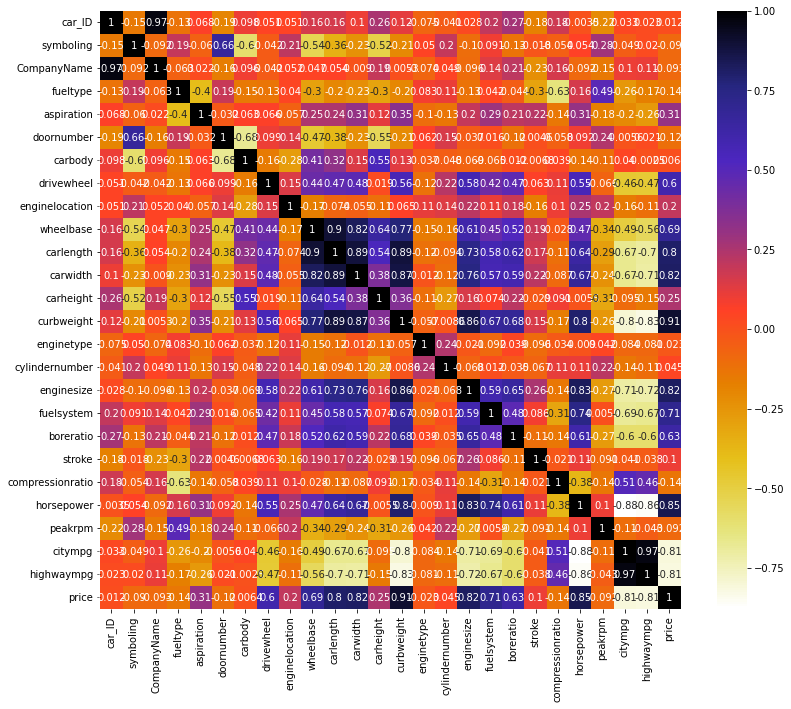

In [79]:
plt.figure(figsize=(13,11)) # ifgsize() takes two parameters- width and height (in inches)
cor=dataset.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
#annot to true gives us the numbers in each cell

In [32]:
dataset.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [33]:
dataset['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

**Label Encording:**

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['wheelbase']=labelencoder .fit_transform(dataset['wheelbase'])
dataset['wheelbase'].unique()

array([ 2, 10, 30, 28, 42, 29, 32, 38, 47,  1,  8, 37, 14,  0, 18,  9, 15,
       49, 33,  6, 12, 25, 41, 43, 51, 19, 52, 48, 35,  5, 17, 11, 22, 31,
        4, 27, 44, 50, 45,  3, 24, 16, 26,  7, 21, 20, 13, 34, 36, 40, 23,
       39, 46])

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['curbweight']=labelencoder .fit_transform(dataset['curbweight'])
dataset['curbweight'].unique()

array([ 92, 115,  66, 116,  87, 118, 126, 142, 136,  73, 104, 109, 137,
       152, 157, 161,   0,   4,  10,   5,  38,  19,  22,  43,  89, 113,
         1,   2,   3,  13,  18,  25,  28,  48,  56,  61,  70,  84,  58,
       106, 170, 169,   7,   8,   9,  15,  16,  71,  72,  86,  76,  80,
        79,  99, 102, 162, 166, 160, 167, 165, 163, 168, 164, 120,  11,
        14,  23,  40,  69,  65, 117, 122, 123,  68,  75,  74,   6,  27,
        12,  17,  29,  20,  30,  24,  63,  60, 143, 155, 138, 140, 147,
       131, 150, 158, 141, 153, 154, 159, 145, 114, 110, 107, 111, 156,
        95,  83,  97, 101, 103, 108, 112, 119,  32,  36,  49,  42,  67,
        88,  57,  81,  78,  96,  21,  31,  26,  55, 144,  33,  35,  54,
        34,  37,  39,  41,  44,  53,  59,  91,  90,  93, 100, 105, 127,
        64,  85,  77,  82, 128, 130, 146, 148,  51,  45,  52,  46,  62,
        50,  47,  98,  94, 121, 132, 124, 133, 134, 149, 125, 135, 129,
       151, 139])

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['symboling']=labelencoder .fit_transform(dataset['symboling'])
dataset['symboling'].unique()

array([5, 3, 4, 2, 1, 0])

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['car_ID']=labelencoder .fit_transform(dataset['car_ID'])
dataset['car_ID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['carlength']=labelencoder .fit_transform(dataset['carlength'])
dataset['carlength'].unique()

array([22, 29, 45, 47, 67, 49, 46, 64, 68, 69,  0,  3,  9,  6, 39, 35,  1,
        2, 13,  5, 20, 41, 25, 28, 33, 72, 66, 10, 18, 24, 48, 40, 65, 61,
       73, 53, 74, 71, 50, 34, 32, 14, 27, 15, 12, 36, 55, 58, 51, 60, 70,
       19, 23, 43, 54, 59,  4,  7, 31, 37, 38,  8, 26, 17, 21, 44, 42, 57,
       62, 30, 11, 16, 52, 56, 63])

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['carwidth']=labelencoder .fit_transform(dataset['carwidth'])
dataset['carwidth'].unique()

array([ 8, 16, 21, 23, 22, 40, 29, 12, 26, 39,  0,  4,  5, 11,  6,  7, 14,
        2, 19,  1, 35, 38,  9, 18, 24, 20, 36, 41, 37, 42, 30, 10, 15, 32,
       31, 13, 43, 25,  3, 17, 28, 27, 34, 33])

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['carheight']=labelencoder .fit_transform(dataset['carheight'])
dataset['carheight'].unique()

array([ 1, 13, 25, 18, 36, 37, 12, 22, 41, 19,  8,  7, 48,  5, 15, 27, 45,
       20, 24,  9, 21, 10, 16,  0,  3, 34, 26, 42, 46, 30, 43, 33, 29,  2,
       11, 28, 31, 39,  4, 38,  6, 32, 14, 17, 47, 23, 35, 40, 44])

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['CompanyName']=labelencoder .fit_transform(dataset['CompanyName'])
dataset['CompanyName'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11,  4, 12, 13,  0, 14, 15, 16,
       18, 17, 19, 20, 21, 22, 23, 24, 25, 27, 26])

In [42]:
dataset['CompanyName']

0       1
1       1
2       1
3       2
4       2
       ..
200    26
201    26
202    26
203    26
204    26
Name: CompanyName, Length: 205, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['fueltype']=labelencoder .fit_transform(dataset['fueltype'])
dataset['fueltype'].unique()

array([1, 0])

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['aspiration']=labelencoder .fit_transform(dataset['aspiration'])
dataset['aspiration'].unique()

array([0, 1])

In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['doornumber']=labelencoder .fit_transform(dataset['doornumber'])
dataset['doornumber'].unique()

array([1, 0])

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['drivewheel']=labelencoder .fit_transform(dataset['drivewheel'])
dataset['drivewheel'].unique()

array([2, 1, 0])

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['enginelocation']=labelencoder .fit_transform(dataset['enginelocation'])
dataset['enginelocation'].unique()

array([0, 1])

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['enginetype']=labelencoder .fit_transform(dataset['enginetype'])
dataset['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['cylindernumber']=labelencoder .fit_transform(dataset['cylindernumber'])
dataset['cylindernumber'].unique()

array([2, 3, 1, 4, 5, 6, 0])

In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['carbody']=labelencoder .fit_transform(dataset['carbody'])
dataset['carbody'].unique()

array([0, 2, 3, 4, 1])

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['fuelsystem']=labelencoder .fit_transform(dataset['fuelsystem'])
dataset['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['enginetype']=labelencoder .fit_transform(dataset['enginetype'])
dataset['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['enginesize']=labelencoder .fit_transform(dataset['enginesize'])
dataset['enginesize'].unique()

array([18, 28, 11, 22, 19, 10, 31, 38,  0,  4,  8, 17, 29,  6,  2, 12, 13,
       14, 40, 43,  5,  1,  3, 23, 21, 35, 39, 42, 41,  7,  9, 15, 34, 27,
       36, 37, 20, 16, 26, 32, 30, 24, 33, 25])

In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['boreratio']=labelencoder .fit_transform(dataset['boreratio'])
dataset['boreratio'].unique()

array([23,  1, 13, 10, 24, 16, 30,  2,  7,  4, 18, 28,  3, 11, 21, 31, 25,
        9, 17, 20, 34, 26, 22, 36, 35, 12, 19, 27,  5, 32, 29, 37, 33,  0,
        8, 15, 14,  6])

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['stroke']=labelencoder .fit_transform(dataset['stroke'])
dataset['stroke'].unique()

array([ 4, 28, 25,  6, 17, 24,  9, 13, 19, 27, 35, 26, 10, 32, 36,  5, 15,
       20, 16, 33, 12, 23, 14, 34, 22, 21, 30,  1, 18,  8,  0,  2,  3, 11,
       29, 31,  7])

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['compressionratio']=labelencoder .fit_transform(dataset['compressionratio'])
dataset['compressionratio'].unique()

array([13, 22,  5,  9,  7,  0, 12, 20, 21, 19, 18,  2, 15, 23, 14,  6, 24,
       10, 30, 28, 26,  1, 27,  4,  8, 25, 11, 17, 16,  3, 29, 31])

In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['horsepower']=labelencoder .fit_transform(dataset['horsepower'])
dataset['horsepower'].unique()

array([30, 45, 27, 33, 29, 40, 48, 26, 36, 53,  0, 10,  8, 19, 43,  4, 13,
        5, 18, 25, 14, 20, 52, 57, 39, 16,  7, 35, 11, 37, 46, 54, 51, 34,
        9,  2, 24, 44, 55, 23, 41, 42, 56, 58, 12, 15, 22,  6,  3, 31, 21,
       49, 47,  1, 17, 32, 50, 38, 28])

In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['peakrpm']=labelencoder .fit_transform(dataset['peakrpm'])
dataset['peakrpm'].unique()

array([10, 16, 19,  2, 15, 11,  8, 21,  7,  6,  1,  3,  5, 12,  0, 17, 20,
       18, 13,  9,  4, 22, 14])

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['citympg']=labelencoder .fit_transform(dataset['citympg'])
dataset['citympg'].unique()

array([ 8,  6, 11,  5,  4,  3, 10,  7,  2, 27, 25, 24, 18, 28, 17, 14, 12,
        0, 13, 23,  9,  1, 26, 15, 19, 22, 21, 16, 20])

In [60]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['highwaympg']=labelencoder .fit_transform(dataset['highwaympg'])
dataset['highwaympg'].unique()

array([10,  9, 13,  5,  8,  4, 12, 11, 28, 24, 22, 20,  7, 29, 23, 17, 16,
       14,  3,  1,  6, 15, 21,  2,  0, 19, 27, 18, 26, 25])

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
dataset['price']=labelencoder .fit_transform(dataset['price'])
dataset['price'].unique()

array([118, 137, 123, 148, 128, 150, 159, 169, 151, 136, 145, 163, 164,
       170, 174, 187, 184,   1,  11,  17,   7,  13,  49,  10,  20,  41,
        63,  67, 114,  14,  25,   5,  16,  32,  34,  47,  70,  65,  89,
       113,  90,  22,  66,  96, 177, 182, 183,   2,   8,  23,  21,  37,
        95, 104, 120, 131,  61,  91,  88,  93,  98, 154, 155, 171, 173,
       172, 176, 180, 181, 186, 188, 138,   4,   9,  19,  42,  81,  62,
       110, 126, 125,  28,  55,  73,   6,  30,  18,  24,  36,  35,  46,
        39,  52,  58,  69,  78, 119, 124, 147, 162, 156, 106, 115, 109,
       122, 130, 144, 142, 146, 141, 152, 153, 111, 166, 178, 179, 185,
       175,  74,  80, 105, 107, 127, 129, 158,   0,  29,  40,  31,  44,
        82,  71, 100,  38,  87,  53, 103,   3,  12,  15,  26,  48,  64,
        27,  33,  45,  43,  59,  72,  54,  57,  75,  77,  60,  79,  85,
        97, 101, 149,  68,  92,  84,  94,  99, 140, 135, 132, 133,  50,
        51,  56,  76,  86, 102,  83, 116, 121, 108, 112, 117, 13

**Divide features into dependent and independent column**

In [62]:
y= dataset['fueltype'] #dependent variable is Decision
x= dataset.drop(['fueltype'], axis=1)

**split the data into train and test**

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 
#random_state = 0 means having same result on the multiple execution
#random_state = None  means having multiple result on the multiple execution.
# test_size = 0.25 25%data test kro.

**split the data into train and test**

In [64]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)

print (xtrain[0:10, :])

[[ 1.04411915  0.2318746   1.02977445 -0.5040817   1.22808661  0.43914198
   1.17807524 -0.14142136 -0.91020391 -0.73696264 -1.01932571 -0.63561794
  -0.87059073 -0.03110935 -0.19873424 -0.81467142 -1.06859869 -0.54877669
  -1.2434701  -0.18207317 -0.98991916 -0.61779116  0.6360742   0.64460537
  -0.70151336]
 [-0.68823504  0.2318746  -0.47205432 -0.5040817   1.22808661 -0.71928428
  -0.66116468 -0.14142136  0.14801188  0.55797257  0.58458607 -0.11156343
  -0.23513185 -0.03110935 -0.19873424  0.01814413 -1.06859869  0.15426139
   0.46639442 -0.58776047 -0.58888395 -0.61779116  0.14456232  0.30096557
  -0.01313286]
 [-0.45046093  0.2318746  -0.33552443  1.9838054   1.22808661 -0.71928428
   1.17807524 -0.14142136  0.85348908  0.65389369  1.15067258  0.41249109
   0.74880449 -0.03110935 -0.19873424  0.57335449  0.91918975  1.66077155
  -0.67351526 -1.26390598  1.75048813 -0.24418623 -1.00229875 -1.07359361
   0.86129643]
 [ 0.07603887  0.2318746  -0.06246465 -0.5040817   1.22808661 -0.71

**apply logistic regression**

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [66]:
y_pred = classifier.predict(xtest)

**check confusion matrix**

In [67]:
from sklearn import metrics
import numpy

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)
# confusion_matrix = metrics.confusion_matrix(actual, predicted)
#ConfusionMAtrix
# confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
# cm_display.plot()
# plt.show()
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 2  0]
 [ 0 50]]


**check model accuracy**

In [69]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0


In [83]:
print ("Accuracy in percentage : ", accuracy_score(y_test, y_pred)*100)

Accuracy in percentage :  100.0


In [70]:
dataset.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [71]:
sns.pairplot(dataset)

Output hidden; open in https://colab.research.google.com to view.

In [72]:
dataset['fueltype'].value_counts()

1    185
0     20
Name: fueltype, dtype: int64

**predict values and compare with actual data**

In [73]:
predictions = classifier.predict(X_test)
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':y_test})

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [74]:
comparison.head(15)

,Predicted Values,Actual Values
52,0,1
181,0,1
5,0,1
18,0,1
188,0,1
170,0,1
76,0,1
154,0,1
104,0,1
33,0,1


**check  percentage**

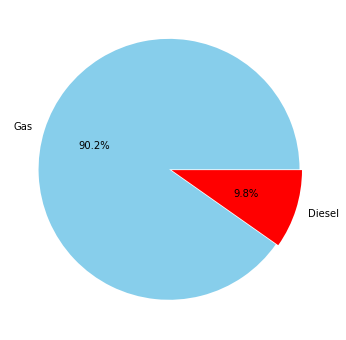

In [75]:
plt.figure(figsize=(10,6))
labels=['Gas' , 'Diesel']
explode = [.01,.01]
color=['skyblue' , 'Red']
sizes=dataset.fueltype.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.show()

**plot Gas and Diesel separately**

(185, 26) (20, 26)


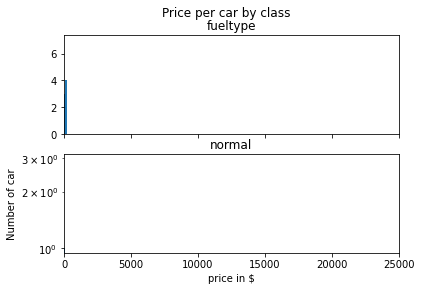

In [80]:
fuel1=dataset[dataset['fueltype']==1]
fuel0=dataset[dataset['fueltype']==0]
print(fuel1.shape , fuel0.shape)

f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Price per car by class')
bins =50
ax1.hist(fuel1.price , bins=bins)
ax1.set_title('fueltype')

ax2.hist(fuel0.price,bins=bins)
ax2.set_title('normal')

plt.xlabel('price in $')
plt.ylabel('Number of car')

plt.xlim(0,25000)
plt.yscale('log')
plt.show()